<a href="https://colab.research.google.com/github/jumbokh/Computer-Vision/blob/main/notebooks/HW1_Identify_Arabic_numerals_CNN_New_J1115116_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

學校: 高雄大學  
系所: 產業碩士專班秋季班_電機工程學系  
年班: 111  
課程: EEI514 電腦視覺與影像處理技術_謝坤達 教授  
學號: J1115116  
姓名: 鍾志煒  

#### 1.卷積神經網絡(Convolutional Neural Network)簡稱CNN，CNN是所有深度學習課程、書籍必教的模型(Model)，CNN在影像識別方面的威力非常強大，許多影樣辨識的模型也都是以CNN的架構為基礎去做延伸。另外值得一提的是CNN模型也是少數參考人的大腦視覺組織來建立的深度學習模型，學會CNN之後，對於學習其他深度學習的模型也會很有幫助，
#### 2.使用CNN來達成99%正確度的手寫數字辨識。

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow.keras.utils as np_utils

In [ ]:
#載入Mnist手寫辨識資料
#Training的資料有60000筆而Testing的資料有10000筆都是28*28 pixel大小的手寫數字圖片
keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()

In [ ]:
print('x_train_image:',x_Train.shape)
print('y_train_label:',y_Train.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [ ]:
print('x_test_image:',x_Test.shape)
print('y_test_label:',y_Test.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


In [ ]:
x_test_image: (10000, 28, 28)
y_test_label: (10000,)

In [ ]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

In [ ]:
x_Train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

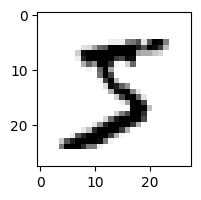

In [ ]:
#畫出圖片長相以及Label
plot_image(x_Train[0])

In [ ]:
y_Train[0]

5

In [ ]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])

        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

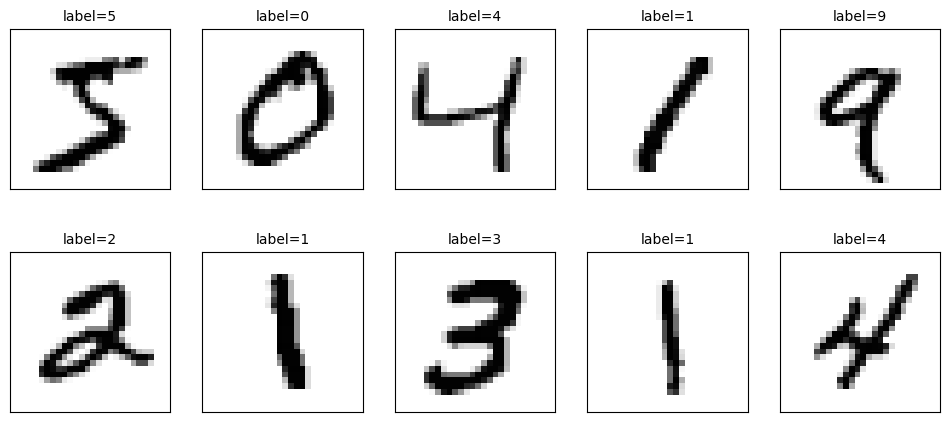

In [ ]:
plot_images_labels_prediction(x_Train,y_Train,[],0,10)

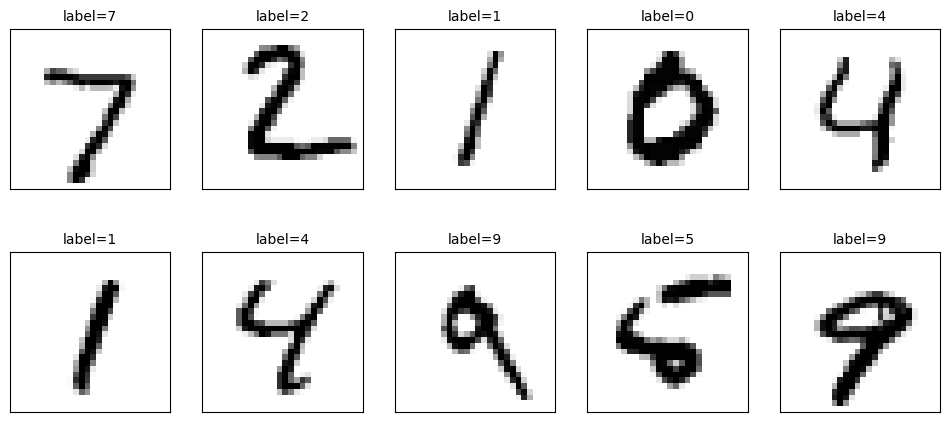

In [ ]:
plot_images_labels_prediction(x_Test,y_Test,[],0,10)

In [ ]:
x_Train.shape

(60000, 28, 28)

#### 由於圖片通常是RGB三個顏色所組成的，假設圖片大小是28*28的彩色圖片，實際上的資料維度就是28*28*3。不過這邊數字的顏色都是單色因此我們轉成28*28*1的資料維度當作未來CNN Model的input

In [ ]:
#多加一個顏色的維度
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [ ]:
x_Train4D.shape

(60000, 28, 28, 1)

#### 灰階的圖片數值為 '0-255' 之間，我們將它縮放到 '0-1' 之間，並對類別資料做onehot-encoding處理

In [ ]:
#將數值縮小到0~1
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [ ]:
#把類別做Onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [ ]:
y_Train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_TrainOneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

#### 建立CNN模型

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [ ]:
model = Sequential()

In [ ]:
#filter為16, Kernel size為(5,5),Padding為(same)
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))

In [ ]:
#MaxPooling size為(2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

#### 在層跟層之間通常會Drop掉一定比例的神經元來避免Overfit的狀況，要Drop掉多少比例沒有一個特定的值，通常是25%~50%之間

In [ ]:
#Drop掉部分神經元避免overfitting
model.add(Dropout(0.25))

In [ ]:
#平坦化
model.add(Flatten())

In [ ]:
model.add(Dense(128, activation='relu'))

In [ ]:
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(10,activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 36)          0         
                                                                 
 flatten (Flatten)           (None, 1764)              0

#### 訓練模型
#### 開始訓練模型，這邊可以看到每一輪的迭代acc 以及 val_acc的準確度都慢慢再提高，從一開始的acc(training):83% val_acc(testing):96%的準確度，到第20輪時acc 以及val_acc 都變成99%的準確度了

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
train_history=model.fit(x=x_Train4D_normalize,
                        y=y_TrainOneHot,validation_split=0.2,
                        epochs=20, batch_size=300,verbose=2)

Epoch 1/20
160/160 - 26s - loss: 0.5313 - accuracy: 0.8322 - val_loss: 0.1072 - val_accuracy: 0.9681 - 26s/epoch - 163ms/step
Epoch 2/20
160/160 - 25s - loss: 0.1486 - accuracy: 0.9560 - val_loss: 0.0692 - val_accuracy: 0.9793 - 25s/epoch - 153ms/step
Epoch 3/20
160/160 - 24s - loss: 0.1074 - accuracy: 0.9680 - val_loss: 0.0536 - val_accuracy: 0.9842 - 24s/epoch - 152ms/step
Epoch 4/20
160/160 - 24s - loss: 0.0847 - accuracy: 0.9745 - val_loss: 0.0487 - val_accuracy: 0.9859 - 24s/epoch - 151ms/step
Epoch 5/20
160/160 - 24s - loss: 0.0754 - accuracy: 0.9772 - val_loss: 0.0454 - val_accuracy: 0.9862 - 24s/epoch - 153ms/step
Epoch 6/20
160/160 - 24s - loss: 0.0650 - accuracy: 0.9801 - val_loss: 0.0394 - val_accuracy: 0.9877 - 24s/epoch - 151ms/step
Epoch 7/20
160/160 - 24s - loss: 0.0586 - accuracy: 0.9819 - val_loss: 0.0372 - val_accuracy: 0.9882 - 24s/epoch - 152ms/step
Epoch 8/20
160/160 - 24s - loss: 0.0522 - accuracy: 0.9839 - val_loss: 0.0390 - val_accuracy: 0.9889 - 24s/epoch - 151

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

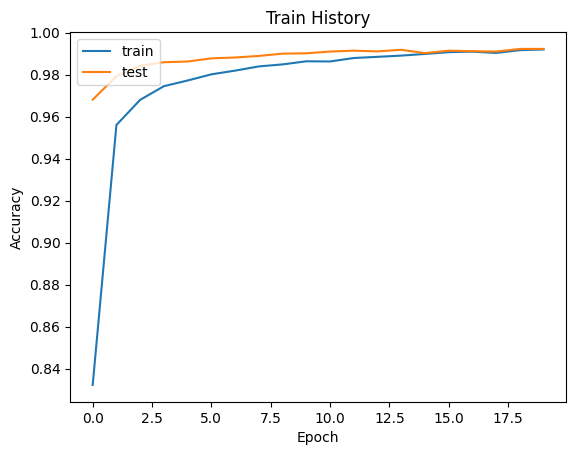

In [ ]:
show_train_history('accuracy','val_accuracy')

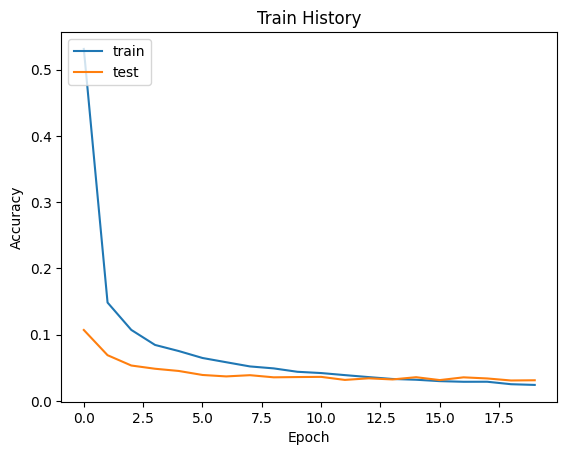

In [ ]:
show_train_history('loss','val_loss')

#### 評估模型準確率

In [ ]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

313/313 [==============================] - 3s 8ms/step - loss: 0.0205 - accuracy: 0.9932


0.9932000041007996

#### 預測結果

In [ ]:
#prediction=model.predict_classes(x_Test4D_normalize)
prediction = np.argmax(model.predict(x_Test4D_normalize), axis=-1)

313/313 [==============================] - 2s 6ms/step


In [ ]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

#### 查看預測結果

In [ ]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10)

        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
        if idx >= len(images):
            break
    plt.show()

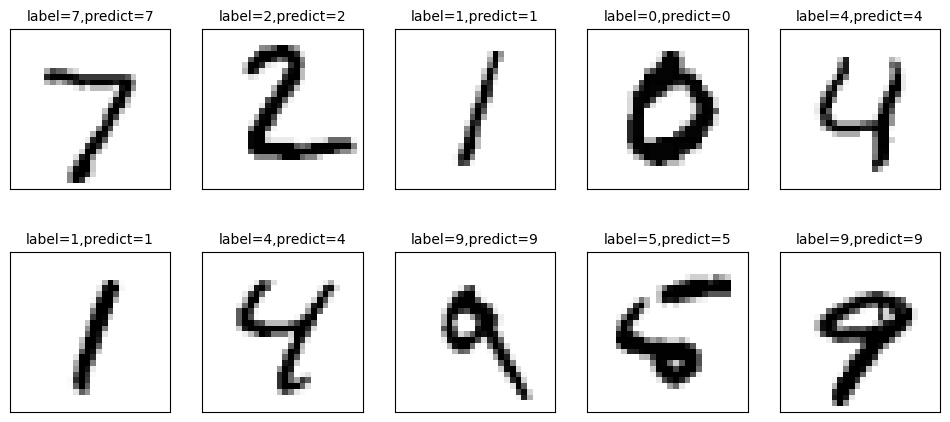

In [ ]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

#### Confusion Matrix

In [ ]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,1,1,1,0
1,0,1130,1,1,0,0,1,2,0,0
2,0,1,1028,0,0,0,0,3,0,0
3,0,0,0,1008,0,0,0,1,1,0
4,0,0,0,0,977,0,1,0,1,3
5,1,0,0,6,0,883,1,0,0,1
6,2,1,0,1,1,4,948,0,1,0
7,0,2,3,0,0,1,0,1019,1,2
8,0,0,2,2,0,1,0,1,965,3


In [ ]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [ ]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
2035,5,3
2597,5,3
4271,5,3
4360,5,3
5937,5,3


In [ ]:
df[(df.label==5)&(df.predict==3)].index

Index([340, 2035, 2597, 4271, 4360, 5937], dtype='int64')

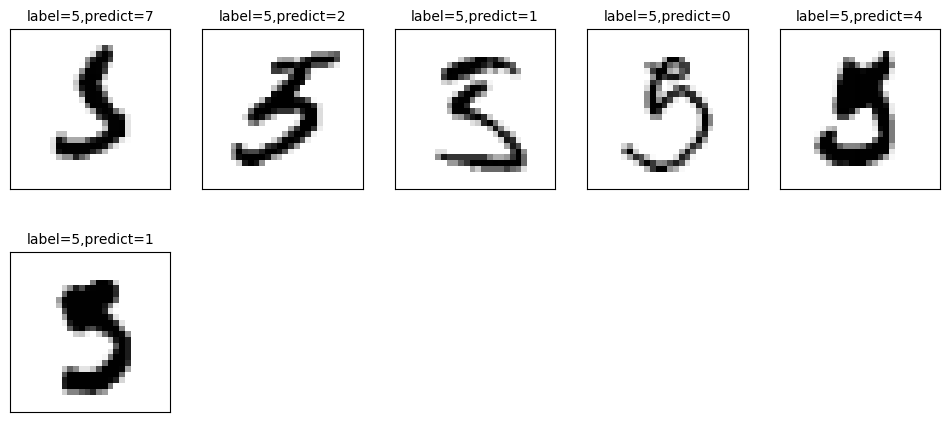

In [ ]:
plot_images_labels_prediction([x_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],[y_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],prediction,idx=0)